In [1]:
import pandas as pd
import numpy as np
import csv
import	koreanize_matplotlib
import matplotlib.pyplot as plt

## 국민연금 가입

In [2]:
f1 = "국민연금 가입 사업장 내역_202007.csv"
pensionDF = pd.read_csv(f1, encoding="cp949")

C:\Users\kdp\AppData\Local\Temp\ipykernel_17472\3590243499.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  pensionDF = pd.read_csv(f1, encoding="cp949")


In [3]:
pensionDF.head()

,자료생성년월(자격마감일(사유발생일이 속하는 달의 다음달 15일)까지 신고분 반영),사업장명,사업자등록번호,사업장가입상태코드 1 등록 2 탈퇴,우편번호,사업장지번상세주소,사업장도로명상세주소,고객법정동주소코드,고객행정동주소코드,법정동주소광역시도코드,...,사업장형태구분코드 1 법인 2 개인,사업장업종코드,사업장업종코드명,적용일자,재등록일자,탈퇴일자,가입자수(고지인원 수 포함),당월고지금액( 국민연금법 시행령 제5조에 의거 기준소득월액 상한액 적용으로 실제소득과 고지금액은 상이할 수 있음 상한액 2019.7.~2020.6. 4860000원(2019.7.1.기준) 상한액 2020.7.~2021.6. 5030000원(2020.7.1.기준) 상한액 2021.7.~2022.6. 5240000원(2021.7.1.기준) ),신규취득자수(납부재개 포함 전달 고지대상자와 비교하므로 실제 취득자와 상이할 수 있음(초일취득 고지 초일이 아닌경우. 미고지(다음달 취득자수에 반영)),상실가입자수(납부예외 포함 전달 고지대상자와 비교하므로 실제 퇴사자와 상이할 수 있음(초일이 아닌 상실자는 다음달 상실자수에 반영) 국민연금법 제6조 8조 동법 시행령 제18조에 의거 60세 도달하거나 퇴직연금수급자 조기노령연금 수급권을 취득한 자는 가입대상에서 제외되며 18세미만 기초수급자는 본인희망에 의해 제외될 수 있음)
0,2020-06,우성기전(주),126811,1,12816,경기도 광주시 도척면,경기도 광주시 도척면 도척윗로,4161033025,4161033025,41,...,1,292201,동력식 수지 공구 제조업,1988-01-01,NaN,NaN,5,820680,0,0
1,2020-06,서능공원묘지운영회(재),102820,1,11191,경기도 포천시 내촌면,,4165032022,4165032022,41,...,1,701700,화장터 운영 묘지 분양 및 관리업,1988-01-01,NaN,NaN,13,3131140,0,0
2,2020-06,노들새마을금고,108820,1,06923,서울특별시 동작구 노량진동,서울특별시 동작구 만양로,1159010100,1159051000,11,...,1,659202,신용조합,1988-01-01,NaN,NaN,14,4178840,0,0
3,2020-06,유창성업(주),122812,1,22849,인천광역시 서구 오류동,인천광역시 서구 갑문2로,2826011900,2826072000,28,...,1,749604,그 외 기타 분류 안된 사업 지원 서비스업(기타임가공,1988-01-01,NaN,NaN,30,5507220,0,2
4,2020-06,희성전자(주),106810,1,04410,서울특별시 용산구 한남동,서울특별시 용산구 독서당로14길,1117013100,1117067000,11,...,1,701201,비주거용 건물 임대업(점포 자기땅),1988-01-01,NaN,NaN,497,199600660,0,1


In [4]:
pensionDF.columns

Index(['자료생성년월(자격마감일(사유발생일이 속하는 달의 다음달 15일)까지 신고분 반영)', ' 사업장명', ' 사업자등록번호',
       ' 사업장가입상태코드 1 등록 2 탈퇴', ' 우편번호', ' 사업장지번상세주소', ' 사업장도로명상세주소',
       ' 고객법정동주소코드', ' 고객행정동주소코드', ' 법정동주소광역시도코드', ' 법정동주소광역시시군구코드',
       ' 법정동주소광역시시군구읍면동코드', ' 사업장형태구분코드 1 법인 2 개인', ' 사업장업종코드', ' 사업장업종코드명',
       ' 적용일자', ' 재등록일자', ' 탈퇴일자', ' 가입자수(고지인원 수 포함)',
       ' 당월고지금액( 국민연금법 시행령 제5조에 의거 기준소득월액 상한액 적용으로 실제소득과 고지금액은 상이할 수 있음  상한액 2019.7.~2020.6. 4860000원(2019.7.1.기준) 상한액 2020.7.~2021.6. 5030000원(2020.7.1.기준) 상한액 2021.7.~2022.6.  5240000원(2021.7.1.기준) )',
       ' 신규취득자수(납부재개 포함  전달 고지대상자와 비교하므로 실제 취득자와 상이할 수 있음(초일취득 고지 초일이 아닌경우. 미고지(다음달 취득자수에 반영))',
       ' 상실가입자수(납부예외 포함  전달 고지대상자와 비교하므로 실제 퇴사자와 상이할 수 있음(초일이 아닌 상실자는 다음달 상실자수에 반영) 국민연금법 제6조 8조 동법 시행령 제18조에 의거 60세 도달하거나 퇴직연금수급자 조기노령연금 수급권을 취득한 자는 가입대상에서 제외되며 18세미만 기초수급자는 본인희망에 의해 제외될 수 있음)'],
      dtype='object')

사용할 데이터 col을 뽑아보자

In [5]:
pensionDF = pensionDF[[" 사업장명", " 사업장지번상세주소",' 가입자수(고지인원 수 포함)',' 당월고지금액( 국민연금법 시행령 제5조에 의거 기준소득월액 상한액 적용으로 실제소득과 고지금액은 상이할 수 있음  상한액 2019.7.~2020.6. 4860000원(2019.7.1.기준) 상한액 2020.7.~2021.6. 5030000원(2020.7.1.기준) 상한액 2021.7.~2022.6.  5240000원(2021.7.1.기준) )']]

"사업장지번상세주소" -> "본사주소"로 변경

In [6]:
pensionDF.columns = ["사업장명", "본사주소", "가입자수", "당월고지금액"]
pensionDF.columns

Index(['사업장명', '본사주소', '가입자수', '당월고지금액'], dtype='object')

### 주소분리

In [7]:
pensionDF.sort_values("당월고지금액")

,사업장명,본사주소,가입자수,당월고지금액
379539,동리종합건설(주)-(일용)정관 꿈의 행복타운 부지조성공사,부산광역시 기장군 정관읍,0,0
26694,(주)이화실업,서울특별시 영등포구 신길동,0,0
92076,(주)마루아라,서울특별시 강서구 가양동,0,0
468264,（주）영성건설기술공사-(일용)군남 반딧불이 행복마을 경관개선 및 기반시설사업,전라남도 영광군 군남면,0,0
468268,퍼시픽종합건설(주)-(일용)탄방동 87-19번지 근생신축공사,대전광역시 서구 탄방동,0,0
...,...,...,...,...
173065,엘지디스플레이(주),서울특별시 영등포구 여의도동,26726,11290838200
156145,에스케이하이닉스 주식회사,경기도 이천시 부발읍,27818,11567455580
14886,엘지전자(주),서울특별시 영등포구 여의도동,40070,16425526440
3587,현대자동차(주),서울특별시 서초구 양재동,67740,28539731280


In [8]:
addr = pd.DataFrame(pensionDF["본사주소"])
addr = addr["본사주소"].apply(lambda x : x.split()[:2])
addr =	pd.DataFrame(addr.tolist(), columns=('시도', '군구'))
addr.head()

,시도,군구
0,경기도,광주시
1,경기도,포천시
2,서울특별시,동작구
3,인천광역시,서구
4,서울특별시,용산구


In [9]:
pensionDF[["시도", "군구", "나머지 주소"]] = pensionDF["본사주소"].str.split(' ', n=2, expand=True)
pensionDF.head()

,사업장명,본사주소,가입자수,당월고지금액,시도,군구,나머지 주소
0,우성기전(주),경기도 광주시 도척면,5,820680,경기도,광주시,도척면
1,서능공원묘지운영회(재),경기도 포천시 내촌면,13,3131140,경기도,포천시,내촌면
2,노들새마을금고,서울특별시 동작구 노량진동,14,4178840,서울특별시,동작구,노량진동
3,유창성업(주),인천광역시 서구 오류동,30,5507220,인천광역시,서구,오류동
4,희성전자(주),서울특별시 용산구 한남동,497,199600660,서울특별시,용산구,한남동


In [10]:
pensionDF = pensionDF.drop("본사주소", axis = True)

In [11]:
pensionDF["시도"].unique()

array(['경기도', '서울특별시', '인천광역시', '전라북도', '충청남도', '충청북도', '강원도', '부산광역시',
       '전라남도', '울산광역시', '경상북도', '세종특별자치시', '대구광역시', '경상남도', '제주특별자치도',
       '광주광역시', '대전광역시', ''], dtype=object)

In [12]:
pensionDF[pensionDF["시도"] == ""]

,사업장명,가입자수,당월고지금액,시도,군구,나머지 주소
3956,(주)우일씨엔에스,14,4182980,,,
4625,(주)성우,23,5574800,,,
7249,(주) 이오니아,25,5366300,,,
10570,주식회사광백건설,10,2638280,,,
16342,주원통신기술(주),6,1141360,,,
...,...,...,...,...,...,...
327011,주식회사자라다교육부천지점,4,672380,,,
328377,행복가정폭력상담소,5,887740,,,
329260,시스템안전주식회사,18,4988040,,,
389567,장한전산(주)/일용/인하대역 헤리움 메트로타워 신축공사 중 전기설비공사,0,0,,,


## <hr>SW 기업 DF뽑기

In [13]:
f2 = "사업자정보_20201031기준.csv"
swDF = pd.read_csv(f2, encoding="cp949")

In [14]:
swDF

,회사명,대표이사,본사주소,홈페이지,재무현황연도
0,(주)라이드소프트,강태훈,"경기도 성남시 수정구 탄리로 57, 성남벤처빌딩 207호 (수진동)",http://www.rydesoft.com,2009
1,(주)코제코,문시환,"서울 서초구 반포대로 90(서초동, 세환빌딩5층)",http://www.pressblog.co.kr,2011
2,(주)시코에프에이,김관중,"서울특별시 금천구 가산디지털2로 114, 3층 302호 (가산동)",http://www.sico.so.kr,2009
3,하니웰에어포트시스템즈게엠베하한국지점,귄테르쉬펜회펠,"인천광역시 중구 공항동로295번길 124, 신불2단지 (운서동)",http://,2009
4,지하정보기술(주),김창동,"경기도 의왕시 이미로 40, 디동 디 609호 (포일동, 인덕원아이티밸리)",http://,2016
...,...,...,...,...,...
45390,주식회사 아람(ARAM),박장훈,"서울특별시 마포구 망원로2길 95, 301호 1-3호(망원동, 진흥빌라)",http://,2020
45391,주식회사 메이코더스,최새미,"서울특별시 송파구 정의로7길 13, 오피스동 618호 (문정동, 힐스테이트에코송파)",http://maycoders.com,2019
45392,주식회사 유맥에어,최종필,경기도 화성시 남양읍 주석로80번길 33,http://umacair.com,2019
45393,(주)웰캅,박재필,경상남도 양산시 동면 금오5길 72-16,http://웰캅.com,2019


In [15]:
swDF.columns

Index(['회사명', '대표이사', '본사주소', '홈페이지', '재무현황연도'], dtype='object')

In [16]:
swDF = swDF[["회사명", "본사주소"]]
swDF.head()

,회사명,본사주소
0,(주)라이드소프트,"경기도 성남시 수정구 탄리로 57, 성남벤처빌딩 207호 (수진동)"
1,(주)코제코,"서울 서초구 반포대로 90(서초동, 세환빌딩5층)"
2,(주)시코에프에이,"서울특별시 금천구 가산디지털2로 114, 3층 302호 (가산동)"
3,하니웰에어포트시스템즈게엠베하한국지점,"인천광역시 중구 공항동로295번길 124, 신불2단지 (운서동)"
4,지하정보기술(주),"경기도 의왕시 이미로 40, 디동 디 609호 (포일동, 인덕원아이티밸리)"


회사명 -> 사업장명으로 변경

In [17]:
swDF.columns = ["사업장명", "본사주소"]
swDF.head()
# f.reindex(columns=['http_status', 'user_agent'])

,사업장명,본사주소
0,(주)라이드소프트,"경기도 성남시 수정구 탄리로 57, 성남벤처빌딩 207호 (수진동)"
1,(주)코제코,"서울 서초구 반포대로 90(서초동, 세환빌딩5층)"
2,(주)시코에프에이,"서울특별시 금천구 가산디지털2로 114, 3층 302호 (가산동)"
3,하니웰에어포트시스템즈게엠베하한국지점,"인천광역시 중구 공항동로295번길 124, 신불2단지 (운서동)"
4,지하정보기술(주),"경기도 의왕시 이미로 40, 디동 디 609호 (포일동, 인덕원아이티밸리)"


In [18]:
swDF[["시도", "군구", "나머지 주소"]] = swDF["본사주소"].str.split(' ', n=2, expand=True)
swDF.head()

C:\Users\kdp\AppData\Local\Temp\ipykernel_17472\1661869292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swDF[["시도", "군구", "나머지 주소"]] = swDF["본사주소"].str.split(' ', n=2, expand=True)
C:\Users\kdp\AppData\Local\Temp\ipykernel_17472\1661869292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swDF[["시도", "군구", "나머지 주소"]] = swDF["본사주소"].str.split(' ', n=2, expand=True)


,사업장명,본사주소,시도,군구,나머지 주소
0,(주)라이드소프트,"경기도 성남시 수정구 탄리로 57, 성남벤처빌딩 207호 (수진동)",경기도,성남시,"수정구 탄리로 57, 성남벤처빌딩 207호 (수진동)"
1,(주)코제코,"서울 서초구 반포대로 90(서초동, 세환빌딩5층)",서울,서초구,"반포대로 90(서초동, 세환빌딩5층)"
2,(주)시코에프에이,"서울특별시 금천구 가산디지털2로 114, 3층 302호 (가산동)",서울특별시,금천구,"가산디지털2로 114, 3층 302호 (가산동)"
3,하니웰에어포트시스템즈게엠베하한국지점,"인천광역시 중구 공항동로295번길 124, 신불2단지 (운서동)",인천광역시,중구,"공항동로295번길 124, 신불2단지 (운서동)"
4,지하정보기술(주),"경기도 의왕시 이미로 40, 디동 디 609호 (포일동, 인덕원아이티밸리)",경기도,의왕시,"이미로 40, 디동 디 609호 (포일동, 인덕원아이티밸리)"


In [19]:
swDF = swDF.drop("본사주소", axis=True)

In [20]:
swDF["시도"].unique()

array(['경기도', '서울', '서울특별시', '인천광역시', '대구', '경상북도', '전라북도', '대전광역시',
       '대구광역시', '충청북도', '부산광역시', '전라남도', '제주특별자치도', '강원도', '충청남도', '경상남도',
       '광주광역시', '경북', '경기', '인천', '충남', '대전', '울산광역시', '전북', '세종특별자치시',
       '충북', '제주', '서울시', '광주', '강원', '부산', '울산', '전남', '울산시', '인천시중구',
       '부산시', '서울특별', '서울특별시시', '제주시', '대구시', '대전시', '충북청주기청원구토성로362번길',
       '경남', '인천광역시동구', '인천시', '광주시'], dtype=object)

In [21]:
addr_aliases =	{'서울':'서울특별시', '대구':'대구광역시', "대구시":"대구광역시",'경북':'경상북도',	'인천':'인천광역시',	
'경기':'경기도',	'충남':'충청남도', '대전':'대전광역시', '전북':'전북특별자치도', "전라북도":"전북특별자치도",	
'충북':'충청북도', '제주':'제주특별자치도', "서울시":"서울특별시", "광주":"광주광역시", "강원":"강원특별자치도", "부산":"부산광역시", "울산":"울산광역시", "전남":"전라남도", "울산시":"울산광역시", "인천시중구":"인천광역시",
"부산시":"부산광역시", "서울특별":"서울특별시", "서울특별시시":"서울특별시", "제주시":"제주특별자치도", "경남":"경상남도", "대구":"대구광역시", "대전시":"대전광역시", "충북청주기청원구토성로362번길":"충청북도", "인천광역시동구":"인천광역시",
"인천시":"인천광역시", "광주시":"광주광역시", "강원도":"강원특별자치도"}

In [22]:
swDF['시도'] = swDF['시도'].apply(lambda	v: addr_aliases.get(v, v))

In [23]:
swDF["시도"].unique()

array(['경기도', '서울특별시', '인천광역시', '대구광역시', '경상북도', '전북특별자치도', '대전광역시',
       '충청북도', '부산광역시', '전라남도', '제주특별자치도', '강원특별자치도', '충청남도', '경상남도',
       '광주광역시', '울산광역시', '세종특별자치시'], dtype=object)

## join 사업장명을 기준으로
- swDF->본사만
- pensionDF->지사포함

In [24]:
mergeDF = pd.merge(swDF, pensionDF, on=["사업장명"])
mergeDF.head()

,사업장명,시도_x,군구_x,나머지 주소_x,가입자수,당월고지금액,시도_y,군구_y,나머지 주소_y
0,(주)시코에프에이,서울특별시,금천구,"가산디지털2로 114, 3층 302호 (가산동)",13,4227520,서울특별시,금천구,가산동
1,지하정보기술(주),경기도,의왕시,"이미로 40, 디동 디 609호 (포일동, 인덕원아이티밸리)",15,4521720,경기도,의왕시,포일동
2,(주)문교,대구광역시,달서구,본동 831 씨티아이디어허브 201호,7,1457060,경상남도,김해시,한림면
3,(주)베스텍,경기도,포천시,화현면 문암동길 33,34,10637880,경기도,포천시,화현면
4,(주)베스텍,경기도,포천시,화현면 문암동길 33,10,3346620,충청남도,아산시,둔포면


In [25]:
mergeDF['시도_y'] = np.where(mergeDF['시도_y']==" ", mergeDF['시도_y'], mergeDF['시도_x'])
mergeDF["시도_y"].value_counts()

서울특별시      5422
경기도        3121
대전광역시       738
부산광역시       635
전라남도        628
경상북도        583
강원특별자치도     554
경상남도        496
대구광역시       484
인천광역시       483
충청북도        431
충청남도        427
전북특별자치도     398
광주광역시       375
제주특별자치도     187
울산광역시       184
세종특별자치시     134
Name: 시도_y, dtype: int64

In [26]:
mergeDF["사업장명"].value_counts() # 대부분이 지사임 

대신네트웍스(주)        135
대한민국고엽제전우회        39
대신네트웍스주식회사        36
(주)아이씨티           18
주식회사 서진           18
                ... 
아이빛연구소(주)          1
창우이엔씨(주)           1
대한전기통신주식회사         1
주식회사 와이제이엠게임즈      1
주식회사 유맥에어          1
Name: 사업장명, Length: 11619, dtype: int64

In [27]:
mergeDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15280 entries, 0 to 15279
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   사업장명      15280 non-null  object
 1   시도_x      15280 non-null  object
 2   군구_x      15280 non-null  object
 3   나머지 주소_x  15279 non-null  object
 4   가입자수      15280 non-null  int64 
 5   당월고지금액    15280 non-null  int64 
 6   시도_y      15280 non-null  object
 7   군구_y      15280 non-null  object
 8   나머지 주소_y  15280 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.2+ MB


In [28]:
a = ['경기도', '서울특별시', '인천광역시', '대구광역시', '경상북도', '전북특별자치도', '대전광역시',
       '충청북도', '부산광역시', '전라남도', '제주특별자치도', '강원특별자치도', '충청남도', '경상남도',
       '광주광역시', '울산광역시', '세종특별자치시'] # swDF

b = ['충청남도', '서울특별시', '경기도', '인천광역시', '충청북도', '강원특별자치도', '부산광역시',
       '전라남도', '울산광역시', '전북특별자치도', '경상북도', '세종특별자치시', '대구광역시', '경상남도', '',
       '제주특별자치도', '대전광역시', '광주광역시'] # pensionDF

In [29]:
set(a) - set(b)

set()

In [30]:
mergeDF2 = mergeDF.drop(["시도_x", "군구_x", "나머지 주소_x"],axis = True)
mergeDF2

,사업장명,가입자수,당월고지금액,시도_y,군구_y,나머지 주소_y
0,(주)시코에프에이,13,4227520,서울특별시,금천구,가산동
1,지하정보기술(주),15,4521720,경기도,의왕시,포일동
2,(주)문교,7,1457060,대구광역시,김해시,한림면
3,(주)베스텍,34,10637880,경기도,포천시,화현면
4,(주)베스텍,10,3346620,경기도,아산시,둔포면
...,...,...,...,...,...,...
15275,주식회사 라온익스,4,1659680,경기도,광주시,오포읍
15276,주식회사 한국건축안전센터,12,2278660,경기도,구리시,교문동
15277,만경엔지니어링 주식회사,4,755080,세종특별자치시,,조치원읍
15278,(주)브리지임팩트,13,2680340,서울특별시,강남구,역삼동


In [31]:
mergeDF2.sort_values("당월고지금액")
mergeDF2.columns = ["사업장명", "가입자수", "당월고지금액", "시도", "군구", "나머지 주소"]
mergeDF2.head()

,사업장명,가입자수,당월고지금액,시도,군구,나머지 주소
0,(주)시코에프에이,13,4227520,서울특별시,금천구,가산동
1,지하정보기술(주),15,4521720,경기도,의왕시,포일동
2,(주)문교,7,1457060,대구광역시,김해시,한림면
3,(주)베스텍,34,10637880,경기도,포천시,화현면
4,(주)베스텍,10,3346620,경기도,아산시,둔포면


In [32]:
col_list = mergeDF2["시도"].unique()
for col in col_list:
    print(f"================{col}================")
    print(mergeDF2[mergeDF2["시도"]==col].sort_values("당월고지금액", ascending=False).head(3)["사업장명"])

================서울특별시================
5358       엘지전자(주)
5927    삼성에스디에스(주)
2866      현대모비스(주)
Name: 사업장명, dtype: object
================경기도================
4784     삼성전자(주)
4662    주식회사 케이티
6972     한국농어촌공사
Name: 사업장명, dtype: object
================대구광역시================
11283    에스엘 주식회사
12681       (주)영일
11677       (주)디오
Name: 사업장명, dtype: object
================전북특별자치도================
6568       (주)올포랜드
1894     대우전자부품(주)
10602    주식회사아이엠아이
Name: 사업장명, dtype: object
================경상남도================
13739    두산중공업(주)
7126      현대위아(주)
3741      영풍전자(주)
Name: 사업장명, dtype: object
================충청북도================
7405          충북대학교산학협력단
4241     (주)건양기술공사건축사사무소
10313            주식회사 다인
Name: 사업장명, dtype: object
================대전광역시================
8366      한국수자원공사
8124    (주)케이티씨에스
69      한국전자통신연구원
Name: 사업장명, dtype: object
================강원특별자치도================
6478     (주)더존비즈온
5794        (주)서흥
2129    (주)한국고용정보
Name: 사업장명, dtype: object
================경상북도============

In [33]:
#mergeDF2[mergeDF2["시도"]==col].sort_values("당월고지금액", ascending=False).head(3)["사업장명"]
col_list

array(['서울특별시', '경기도', '대구광역시', '전북특별자치도', '경상남도', '충청북도', '대전광역시',
       '강원특별자치도', '경상북도', '제주특별자치도', '광주광역시', '울산광역시', '인천광역시', '전라남도',
       '부산광역시', '충청남도', '세종특별자치시'], dtype=object)

## <hr>Group Area 

In [34]:
group_area = mergeDF2.groupby(["시도"]).sum()
group_area.head()

C:\Users\kdp\AppData\Local\Temp\ipykernel_17472\1388286200.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_area = mergeDF2.groupby(["시도"]).sum()


,가입자수,당월고지금액
시도,,
강원특별자치도,11917,3085589340
경기도,236125,86485431700
경상남도,20316,6709778200
경상북도,21389,7147594300
광주광역시,7079,1715673600


In [35]:
group_area["div"] = group_area["당월고지금액"] / group_area["가입자수"]

In [36]:
group_area = group_area.sort_values("div", ascending=False)
group_area

,가입자수,당월고지금액,div
시도,,,
울산광역시,16238,6293253980,387563.368641
경기도,236125,86485431700,366269.694865
경상북도,21389,7147594300,334171.504044
경상남도,20316,6709778200,330270.633983
서울특별시,392580,127055216560,323641.592949
대전광역시,31622,8983860040,284101.576118
인천광역시,18593,5182222780,278719.022213
충청남도,8875,2379554420,268118.807887
전라남도,12509,3301451600,263926.101207


In [42]:
col_list = group_area.index.to_list() # 순위대로 
company = []
color = []
for col in col_list:
    print(f"================{col}================")
    print(mergeDF2[mergeDF2["시도"]==col].sort_values("당월고지금액", ascending=False).head(3)["사업장명"])
    sr = mergeDF2[mergeDF2["시도"]==col].sort_values("당월고지금액", ascending=False).head(1)["사업장명"]
    if "광역시" in col:
        color.append("red")
    else:
        color.append("gray")
    company += sr.to_list()
    print(f"company = {company}")

================울산광역시================
6096     현대중공업주식회사
576         (주)네오텍
11367    금양산업개발(주)
Name: 사업장명, dtype: object
company = ['현대중공업주식회사']
================경기도================
4784     삼성전자(주)
4662    주식회사 케이티
6972     한국농어촌공사
Name: 사업장명, dtype: object
company = ['현대중공업주식회사', '삼성전자(주)']
================경상북도================
4617      (주)포스코건설
5167     한국전력기술(주)
6559    (주)포스코아이씨티
Name: 사업장명, dtype: object
company = ['현대중공업주식회사', '삼성전자(주)', '(주)포스코건설']
================경상남도================
13739    두산중공업(주)
7126      현대위아(주)
3741      영풍전자(주)
Name: 사업장명, dtype: object
company = ['현대중공업주식회사', '삼성전자(주)', '(주)포스코건설', '두산중공업(주)']
================서울특별시================
5358       엘지전자(주)
5927    삼성에스디에스(주)
2866      현대모비스(주)
Name: 사업장명, dtype: object
company = ['현대중공업주식회사', '삼성전자(주)', '(주)포스코건설', '두산중공업(주)', '엘지전자(주)']
================대전광역시================
8366      한국수자원공사
8124    (주)케이티씨에스
69      한국전자통신연구원
Name: 사업장명, dtype: object
company = ['현대중공업주식회사', '삼성전자(주)', '(주)포스코건설', '두산중공업(주

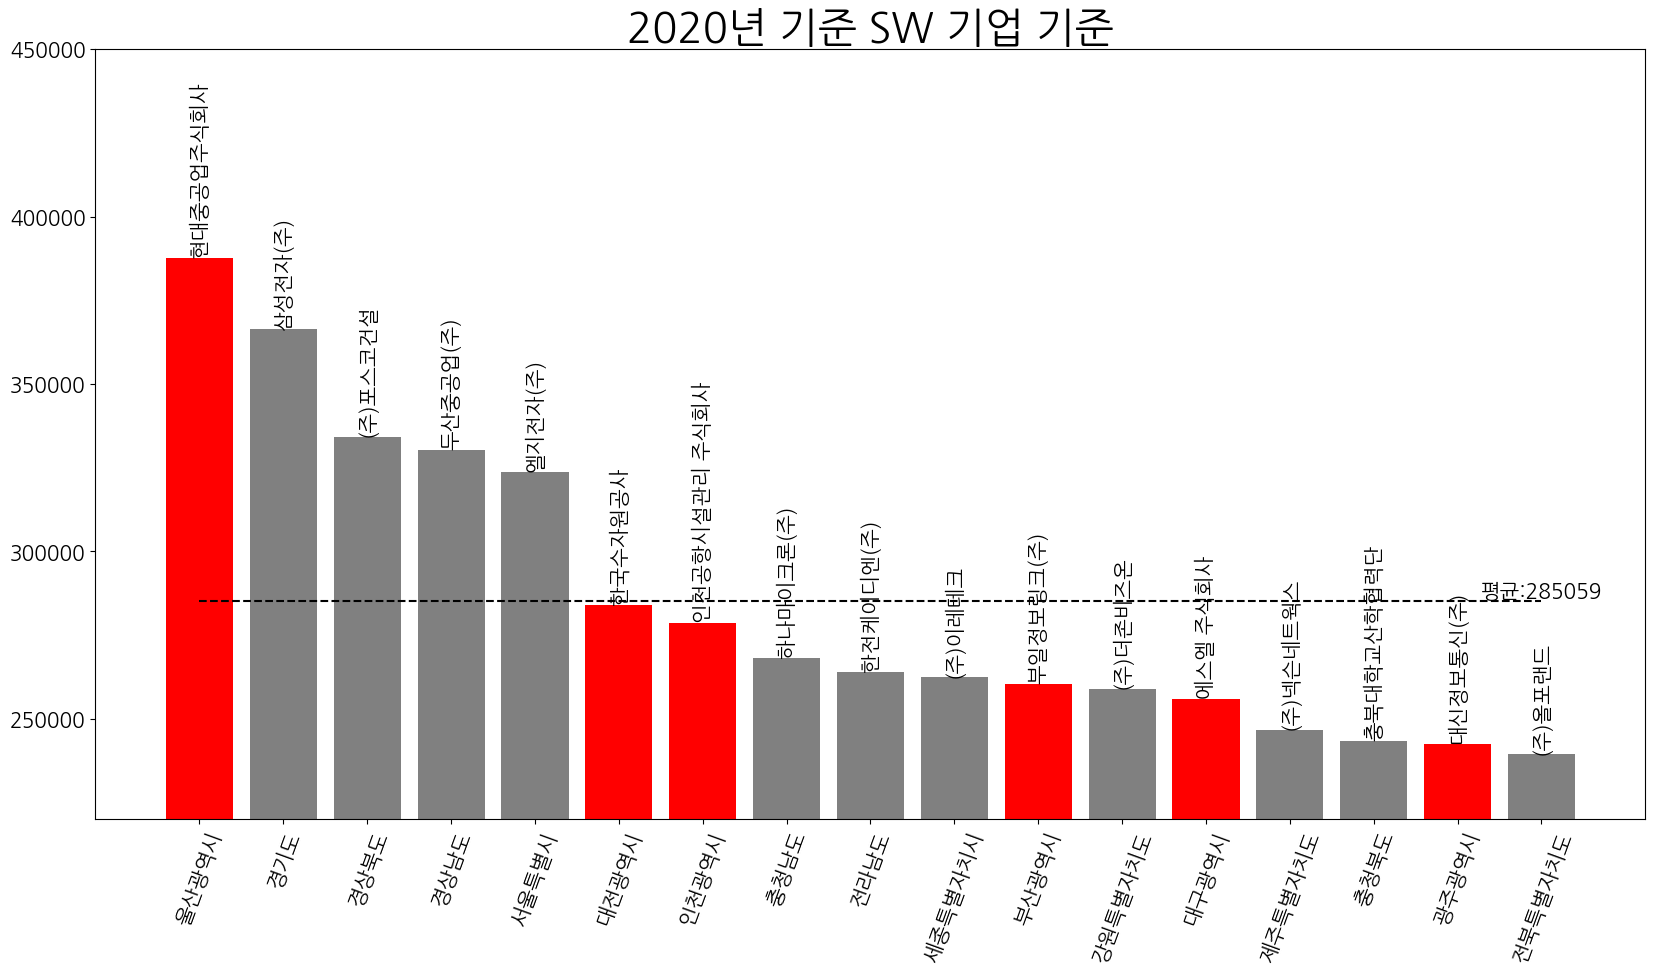

In [48]:
avg = group_area["div"].mean()
plt.figure(figsize=(20, 10))

x = group_area.index.to_list()
y = group_area["div"].to_list()

plt.plot(x, [avg]*len(x), "k--")
bar = plt.bar(x, y, color = color)


plt.xticks(rotation=70)
plt.ylim(220000, 450000)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

idx = 0

plt.title("2020년 기준 SW 기업 기준", fontsize = "30")
# 숫자 넣는 부분
for rect in bar:
    height = rect.get_height()
    if idx < 9:
        plt.text(rect.get_x() + rect.get_width()/2.0, height, company[idx], ha='center', va='bottom', size = 15, rotation=90)
    else:
        plt.text(rect.get_x() + rect.get_width()/2.0, height, company[idx], ha='center', va='bottom', size = 15, rotation=90)
    idx += 1

plt.text(rect.get_x() + rect.get_width()/2.0, avg, f"평균:{round(avg)}", ha='center', va='bottom', size = 15)

plt.show()

In [39]:
company

['현대중공업주식회사',
 '삼성전자(주)',
 '(주)포스코건설',
 '두산중공업(주)',
 '엘지전자(주)',
 '한국수자원공사',
 '인천공항시설관리 주식회사',
 '하나마이크론(주)',
 '한전케이디엔(주)',
 '(주)이레테크',
 '부일정보링크(주)',
 '(주)더존비즈온',
 '에스엘 주식회사',
 '(주)넥슨네트웍스',
 '충북대학교산학협력단',
 '대신정보통신(주)',
 '(주)올포랜드']

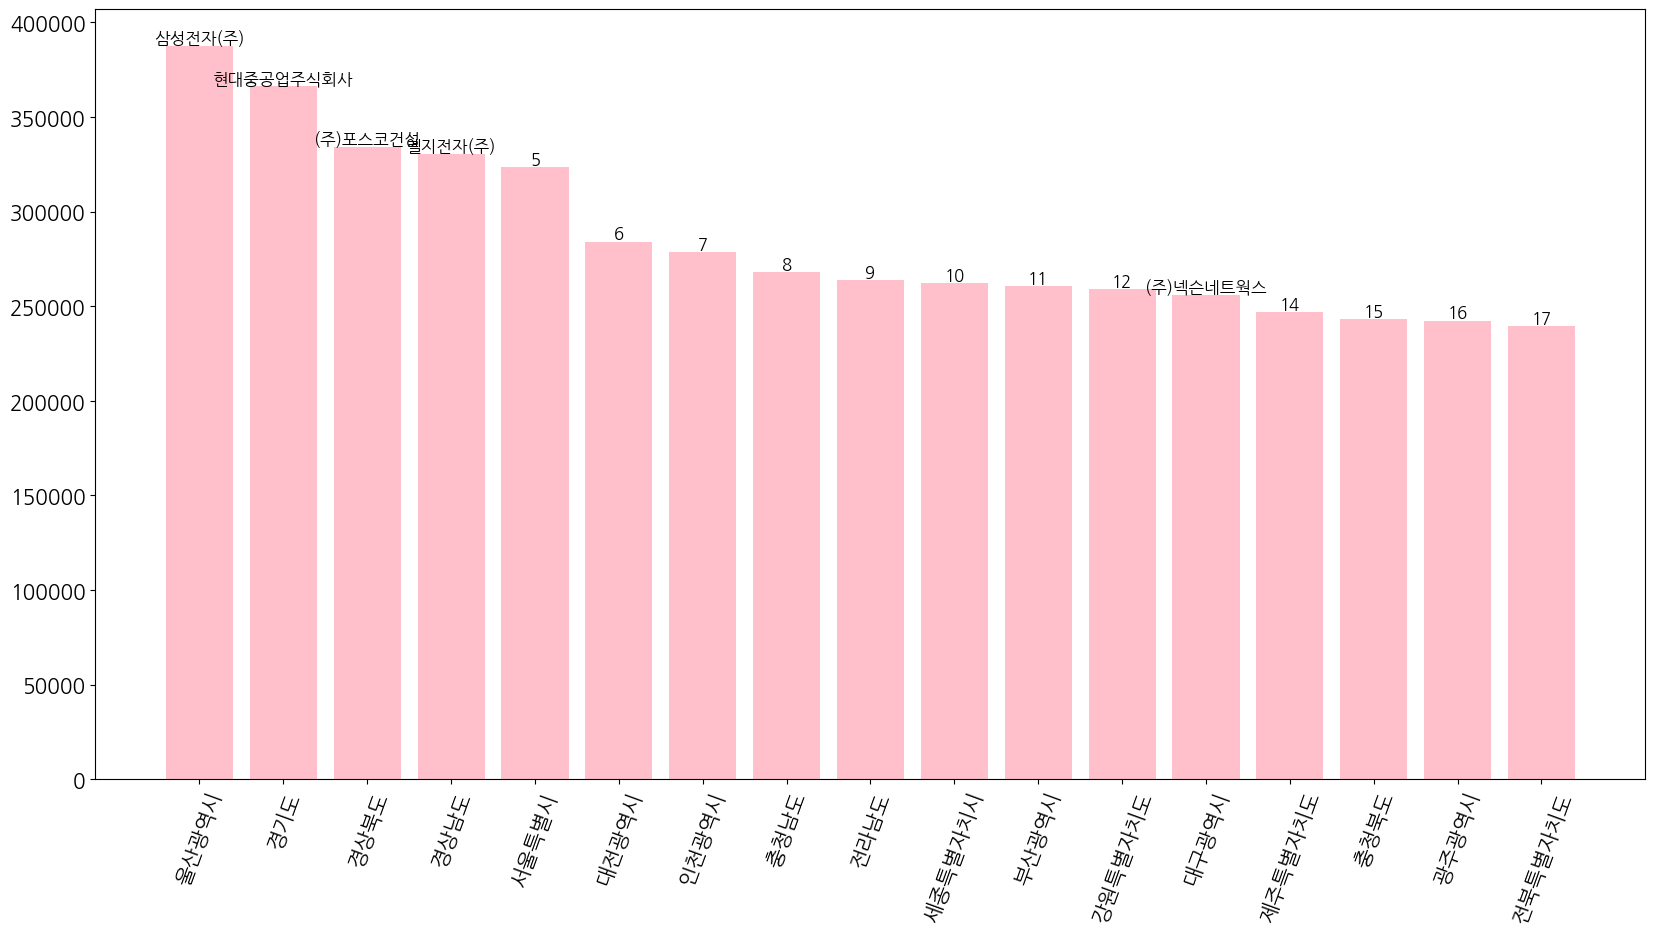

In [40]:
plt.figure(figsize=(20, 10))
x = group_area.index.to_list()
y = group_area["div"].to_list()
bar = plt.bar(x, y, color = 'pink')
plt.xticks(rotation=70)
# plt.ylim(280000, 350000)
plt.rc('xtick', labelsize=20)

company = ["삼성전자(주)", "현대중공업주식회사", "(주)포스코건설", "엘지전자(주)", "5", "6", "7", "8", "9", "10", "11", "12", "(주)넥슨네트웍스", "14", "15", "16", "17"]
idx = 0
# 숫자 넣는 부분
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, company[idx], ha='center', va='bottom', size = 12)
    idx += 1